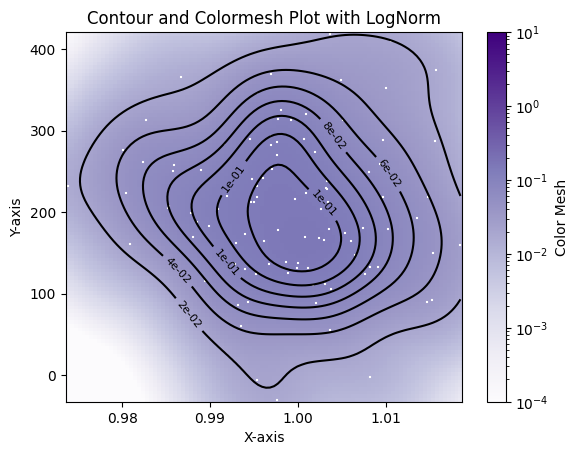

In [1]:
#  Important lesson I learn that KDEpy do not standardize data and hence data in different dimesnions if have different 
#range it will show weird outputs. Scipy and awkde code do standardize data by default

# First a simple example KDE with scipy and my simple code
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def generate(n):
    # generate data
    np.random.seed(42)
    x = np.random.normal(size=n, loc=1, scale=0.01)
    np.random.seed(1)
    y = np.random.normal(size=n, loc=200, scale=100)
    return x, y

x, y = generate(100)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

#fig, ax = plt.subplots(figsize=(7, 7))
#ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
#          extent=[xmin, xmax, ymin, ymax],
#          aspect='auto', alpha=.75
#         )
#ax.plot(x, y, 'ko', ms=5)
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
#plt.show()
# lets make a contour plot

fig, ax = plt.subplots()
mesh = ax.pcolormesh(X, Y, Z, norm=LogNorm(vmin=1e-4, vmax=10), shading='auto', cmap='Purples')
fig.colorbar(mesh, ax=ax, label='Color Mesh')

# Create contour lines
contour = ax.contour(X, Y, Z, colors='k')#levels=np.logspace(-4, 1, 10))#, norm=LogNorm(vmin=1e-4, vmax=10), colors='white')
ax.clabel(contour, inline=1, fontsize=8, fmt='%1.0e')
plt.scatter(x, y, s=2, marker='+', c='white')
# Add titles and labels
ax.set_title('Contour and Colormesh Plot with LogNorm')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()

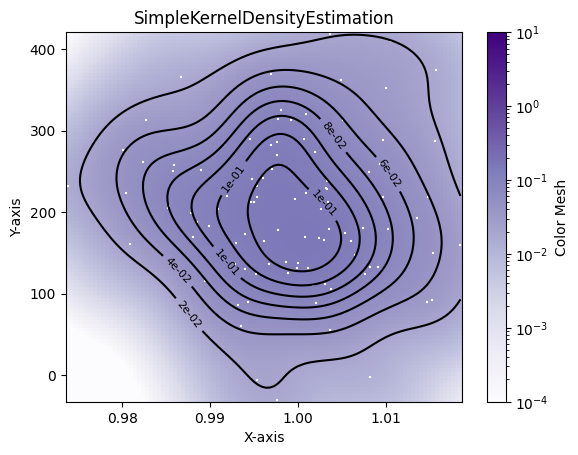

In [2]:
# use class 
import density_estimate as d
sample = np.column_stack((x, y))
eval_pts = np.column_stack((X.flatten(), Y.flatten()))
kde = d.SimpleKernelDensityEstimation(sample, bandwidth='scott', dim_names=['mass1', 'mass2']) #scipy have default bw=scott
z = kde.evaluate(eval_pts)
Z = z.reshape(X.shape)

fig, ax = plt.subplots()
mesh = ax.pcolormesh(X, Y, Z,  shading='auto', cmap='Purples', norm=LogNorm(vmin=1e-4, vmax=10))
fig.colorbar(mesh, ax=ax, label='Color Mesh')
# Create contour lines
contour = ax.contour(X, Y, Z, colors='k')#levels=np.logspace(-4, 1, 10))#, norm=LogNorm(vmin=1e-4, vmax=10), colors='white')
ax.clabel(contour, inline=1, fontsize=8, fmt='%1.0e')
plt.scatter(x, y, s=2, marker='+', c='white')
# Add titles and labels
ax.set_title('Contour and Colormesh Plot with LogNorm')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.title('SimpleKernelDensityEstimation')
plt.show()

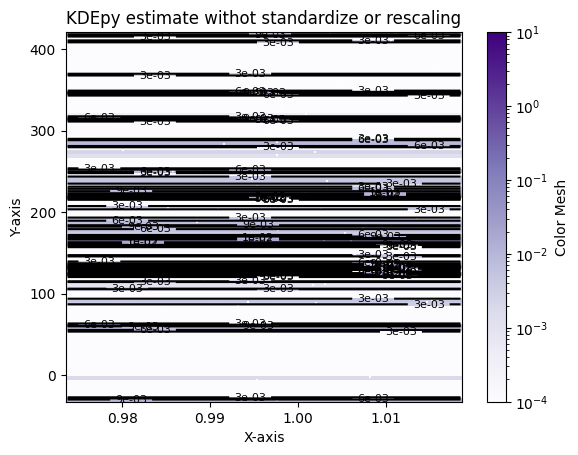

In [3]:
#use adaptive class KDEpy based without standardization/with standardization
import adaptive_kde as ad
weights = None
adp_kde = ad.AdaptiveBwKDE(sample, weights, bandwidth=0.5, alpha=0.0)#, stdize=True, input_transf=['None', 'None'])#, bandwidth=1., alpha=0.0)
#print(adp_kde.alpha, adp_kde.bandwidth)
z = adp_kde.evaluate(eval_pts) #_with_transf(eval_pts)
Z = z.reshape(X.shape)
fig, ax = plt.subplots()
mesh = ax.pcolormesh(X, Y, Z,  shading='auto', cmap='Purples', norm=LogNorm(vmin=1e-4, vmax=10))
fig.colorbar(mesh, ax=ax, label='Color Mesh')
# Create contour lines
contour = ax.contour(X, Y, Z, colors='k')#levels=np.logspace(-4, 1, 10))#, norm=LogNorm(vmin=1e-4, vmax=10), colors='white')
ax.clabel(contour, inline=1, fontsize=8, fmt='%1.0e')
plt.scatter(x, y, s=2, marker='+', c='white')
# Add titles and labels
ax.set_title('Contour and Colormesh Plot with LogNorm')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.title('KDEpy estimate withot standardize or rescaling')
plt.show()
# we get total bullshit because we need to re-scale the data or  try to use stdiz (rescaling need to know what factor to rescale for each dimension) 

self.std [9.03616177e-03 8.85156214e+01]


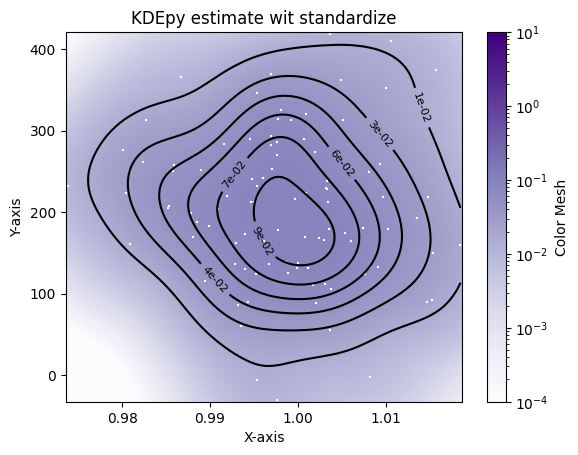

In [4]:
########### Now lets try std option to be True and use input_tranf as none and also evaluate with tranfs 
adp_kde = ad.AdaptiveBwKDE(sample, weights, bandwidth=0.5, alpha=0.0, stdize=True, input_transf=['None', 'None'])#scott is not available
#print(adp_kde.alpha, adp_kde.bandwidth)
z = adp_kde.evaluate_with_transf(eval_pts) #evalaue with tranform is important
#z = adp_kde.evaluate(eval_pts) you will get nonj sense values without retransform
Z = z.reshape(X.shape)
fig, ax = plt.subplots()
mesh = ax.pcolormesh(X, Y, Z,  shading='auto', cmap='Purples', norm=LogNorm(vmin=1e-4, vmax=10))
fig.colorbar(mesh, ax=ax, label='Color Mesh')
# Create contour lines
contour = ax.contour(X, Y, Z, colors='k')#levels=np.logspace(-4, 1, 10))#, norm=LogNorm(vmin=1e-4, vmax=10), colors='white')
ax.clabel(contour, inline=1, fontsize=8, fmt='%1.0e')
plt.scatter(x, y, s=2, marker='+', c='white')
# Add titles and labels
ax.set_title('Contour and Colormesh Plot with LogNorm')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.title('KDEpy estimate wit standardize')
plt.show()

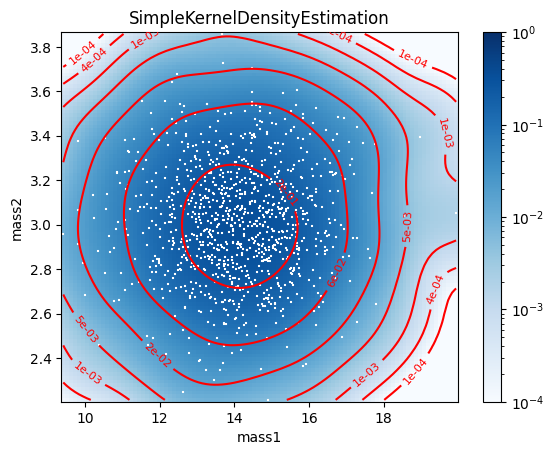

In [16]:
### From example given in code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import density_estimate as d
mean1, sigma1 = 14.0, 1.5
mean2, sigma2 = 3.0, 0.25
n_samples = 1000
rndgen = np.random.RandomState(seed=1)
sample1 = rndgen.normal(mean1, sigma1, size=n_samples)
sample2 = rndgen.normal(mean2, sigma2, size=n_samples)
sample = np.column_stack((sample1, sample2)) # shape is (n_points, n_features)
kde = d.SimpleKernelDensityEstimation(sample, bandwidth=0.5, dim_names=['mass1', 'mass2'])
xgrid = np.linspace(sample1.min(), sample1.max(), 100)
ygrid = np.linspace(sample2.min(), sample2.max(), 100)
XX, YY = np.meshgrid(xgrid, ygrid)

eval_pts = np.column_stack((XX.flatten(), YY.flatten()))
zz = kde.evaluate(eval_pts)
ZZ = zz.reshape(XX.shape)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
    # Older mpl versions may require shading='flat'
c = plt.pcolormesh(XX, YY, ZZ, cmap='Blues', norm=LogNorm(vmin=1e-4, vmax=1), shading='nearest')
plt.colorbar(c)
contour = plt.contour(XX, YY, ZZ, colors='r', levels=np.logspace(-4, 1, 10))#, norm=LogNorm(vmin=1e-4, vmax=10), colors='white')
ax.clabel(contour, inline=1, fontsize=8, fmt='%1.0e')
plt.scatter(sample1, sample2, s=2, marker='+', c='white')
plt.xlabel(kde.dim_names[0])
plt.ylabel(kde.dim_names[1])
plt.title('SimpleKernelDensityEstimation')
#plt.savefig('plot1_simpleKerneldensity_scipybacked.png')
plt.show()

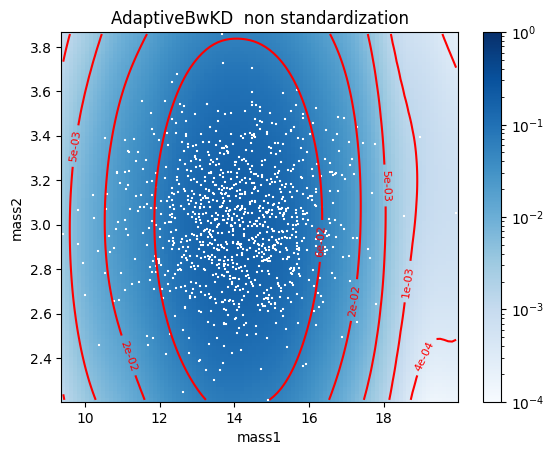

In [15]:
import adaptive_kde as ad
weights=None
adp_kde_nostd = ad.AdaptiveBwKDE(sample, weights, bandwidth=0.5, alpha=0.0)
XX, YY = np.meshgrid(xgrid, ygrid, indexing='ij')
eval_pts = np.column_stack((XX.flatten(), YY.flatten()))
zz = adp_kde_nostd.evaluate(eval_pts)
ZZ = zz.reshape(XX.shape)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
    # Older mpl versions may require shading='flat'
c = plt.pcolormesh(XX, YY, ZZ, cmap='Blues', norm=LogNorm(vmin=1e-4, vmax=1), shading='nearest')
plt.colorbar(c)
contour = plt.contour(XX, YY, ZZ, colors='r', levels=np.logspace(-4, 1, 10))#, norm=LogNorm(vmin=1e-4, vmax=10), colors='white')
ax.clabel(contour, inline=1, fontsize=8, fmt='%1.0e')
plt.scatter(sample1, sample2, s=2, marker='+', c='white')
plt.xlabel(kde.dim_names[0])
plt.ylabel(kde.dim_names[1])
plt.title('AdaptiveBwKD  non standardization')
#plt.savefig('plot2_AdaptiveBwKDE_KDEpybacked.png')
plt.show()

self.std [1.4715062  0.25750936]


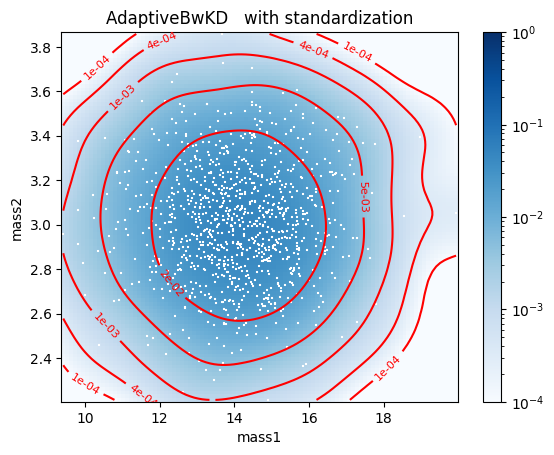

In [14]:
adp_kde_std = ad.AdaptiveBwKDE(sample, weights, bandwidth=0.5, alpha=0.0, stdize=True, input_transf=['none', 'none'])
XX, YY = np.meshgrid(xgrid, ygrid, indexing='ij')
eval_pts = np.column_stack((XX.flatten(), YY.flatten()))
zz = adp_kde_std.evaluate_with_transf(eval_pts)
ZZ = zz.reshape(XX.shape)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
    # Older mpl versions may require shading='flat'
c = plt.pcolormesh(XX, YY, ZZ, cmap='Blues', norm=LogNorm(vmin=1e-4, vmax=1), shading='nearest')
plt.colorbar(c)
contour = plt.contour(XX, YY, ZZ, colors='r',levels=np.logspace(-4, 1, 10))#, norm=LogNorm(vmin=1e-4, vmax=10), colors='white')
ax.clabel(contour, inline=1, fontsize=8, fmt='%1.0e')
plt.scatter(sample1, sample2, s=2, marker='+', c='white')
plt.xlabel(kde.dim_names[0])
plt.ylabel(kde.dim_names[1])
plt.title('AdaptiveBwKD   with standardization')
#plt.savefig('plot2_AdaptiveBwKDE_KDEpybacked.png')
plt.show()

In [17]:
std_vals = np.std(sample, axis=0)
print(std_vals)

[1.4715062  0.25750936]


In [19]:
np.std(sample.T[1])

0.25750935705423933

In [26]:
for i, val in enumerate(eval_pts.T):
    print(val)

[ 9.41935343  9.52560142  9.6318494  ... 19.72540808 19.83165607
 19.93790406]
[2.21166064 2.21166064 2.21166064 ... 3.85816586 3.85816586 3.85816586]


In [27]:
eval_pts[:, 0]

array([ 9.41935343,  9.52560142,  9.6318494 , ..., 19.72540808,
       19.83165607, 19.93790406])

std each dim [1.4715062  0.25750936]
std_dim 1.4715062008983175
std_dim 0.25750935705423933


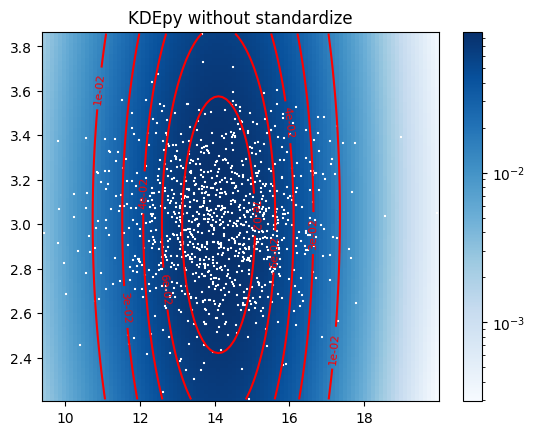

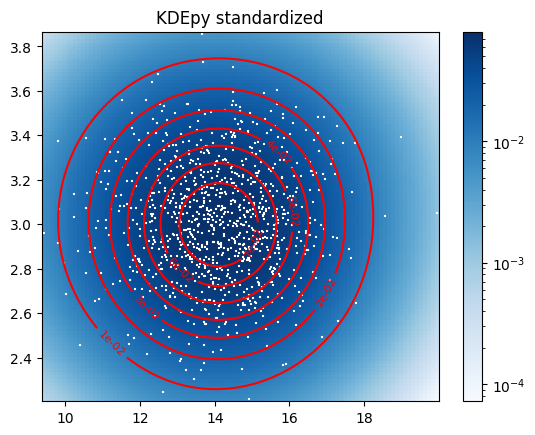

In [29]:
#Direct  try with KDEpy
mean1, sigma1 = 14.0, 1.5
mean2, sigma2 = 3.0, 0.25
n_samples = 1000
rndgen = np.random.RandomState(seed=1)
sample1 = rndgen.normal(mean1, sigma1, size=n_samples)
sample2 = rndgen.normal(mean2, sigma2, size=n_samples)
sample = np.column_stack((sample1, sample2)) # shape is (n_points, n_features)
std_vals = np.std(sample, axis=0)

#standardize or rescale the data by dividing it with std
xgrid = np.linspace(sample1.min(), sample1.max(), 100)
ygrid = np.linspace(sample2.min(), sample2.max(), 100)
XX, YY = np.meshgrid(xgrid, ygrid)
eval_pts = np.column_stack((XX.flatten(), YY.flatten()))
from KDEpy.TreeKDE import TreeKDE
save_std = np.std(sample, axis=0)
print("std each dim", save_std)
std_samples = np.zeros_like(sample)
std_on_eval_pts = np.zeros_like(eval_pts) #
# std will be same as we saves in std
for i, col_data in enumerate(sample.T):
    print("std_dim", np.std(col_data))
    #std_samples[:, i] = col_data/np.std(col_data)
    std_samples[:, i] = col_data/save_std[i]
#### Notice we are using std on training data on testsin data this is crucial step
for i, col_data in enumerate(eval_pts.T):
    std_on_eval_pts[:, i] = col_data/save_std[i]
kdepy_kde = TreeKDE(bw=1.0).fit(sample,weights=None)
kde_on_stdsamples = TreeKDE(bw=1.0).fit(std_samples,weights=None)
ZZ = kdepy_kde.evaluate(eval_pts)
ZZ = ZZ.reshape(XX.shape)
ZZstd = kde_on_stdsamples.evaluate(std_on_eval_pts) # we may need a jacobian factor here?
#retransforms
ZZ = ZZ.reshape(XX.shape)
ZZstd = ZZstd.reshape(XX.shape)
c = plt.pcolormesh(XX, YY, ZZ, cmap='Blues', norm=LogNorm(), shading='nearest')
plt.colorbar(c)
contour = plt.contour(XX, YY, ZZ, colors='r')#levels=np.logspace(-4, 1, 10))#, norm=LogNorm(vmin=1e-4, vmax=10), colors='white')
ax.clabel(contour, inline=1, fontsize=8, fmt='%1.0e')
plt.scatter(sample1, sample2, s=2, marker='+', c='white')
#plt.xlabel(kde.dim_names[0])
#plt.ylabel(kde.dim_names[1])
plt.title('KDEpy without standardize')
#plt.savefig('plot3_KDEpydirect.png')
plt.show()
c = plt.pcolormesh(XX, YY, ZZstd, cmap='Blues', norm=LogNorm(), shading='nearest')
plt.colorbar(c)
contour = plt.contour(XX, YY, ZZstd, colors='r')#levels=np.logspace(-4, 1, 10))#, norm=LogNorm(vmin=1e-4, vmax=10), colors='white')
ax.clabel(contour, inline=1, fontsize=8, fmt='%1.0e')
plt.scatter(sample1, sample2, s=2, marker='+', c='white')
#plt.xlabel(kde.dim_names[0])
#plt.ylabel(kde.dim_names[1])
plt.title('KDEpy standardized')
#plt.savefig('plot3_KDEpydirect.png')
plt.show()

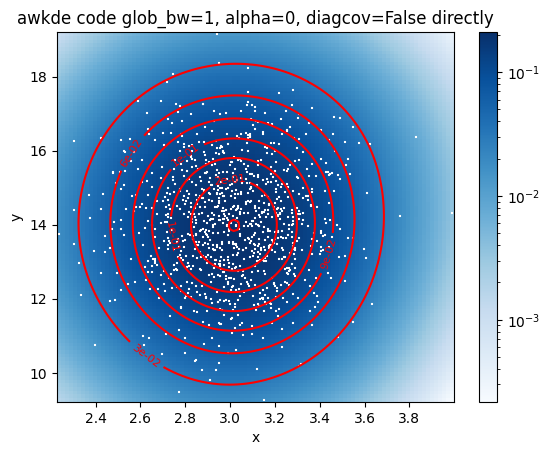

In [5]:
# with awkde code
from awkde import GaussianKDE
kdeawkde = GaussianKDE(glob_bw=0.5, alpha=0.0, diag_cov=False)
kdeawkde.fit(sample)
ZZ = kdeawkde.predict(eval_pts)
ZZ = ZZ.reshape(XX.shape)
c = plt.pcolormesh(XX, YY, ZZ, cmap='Blues', norm=LogNorm(), shading='nearest')
plt.colorbar(c)
contour = plt.contour(XX, YY, ZZ, colors='r')#levels=np.logspace(-4, 1, 10))#, norm=LogNorm(vmin=1e-4, vmax=10), colors='white')
ax.clabel(contour, inline=1, fontsize=8, fmt='%1.0e')
plt.scatter(sample1, sample2, s=2, marker='+', c='white')
plt.xlabel('x')
plt.ylabel('y')
plt.title('awkde code glob_bw=1, alpha=0, diagcov=False directly')
#plt.savefig('plot5_awkdefdiagcov.png')
plt.show()

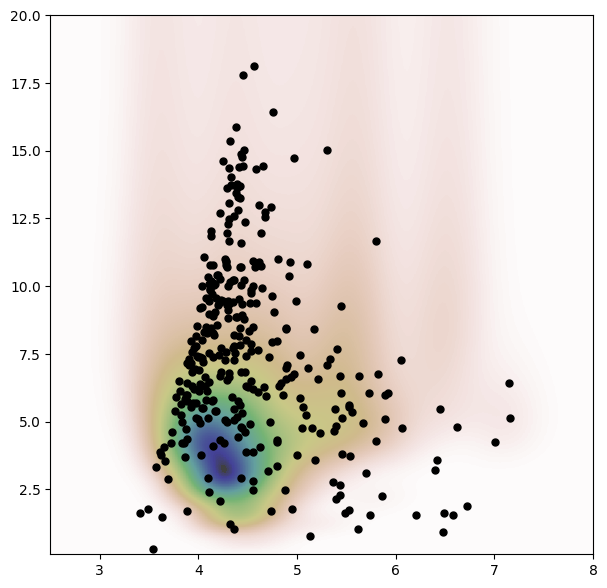

In [6]:
allPEdata = np.loadtxt('datamedianMz_z_pdet.txt').T
all_Mz = allPEdata[0]
all_z = allPEdata[1]
all_pdet = allPEdata[-1]
data = np.vstack((np.log10(all_Mz), all_z))

Mz_eval = np.logspace(2.5, 8, 200)
log10Mz_eval = np.log10(Mz_eval)
z_eval = np.logspace(-1, np.log10(20), 200)
log10Mz_mesh, z_mesh = np.meshgrid(log10Mz_eval, z_eval)
xmin = np.min(log10Mz_eval)
xmax = np.max(log10Mz_eval)
ymin = np.min(z_eval)
ymax = np.max(z_eval)
grid_pts = np.array(list(map(np.ravel, [log10Mz_mesh, z_mesh])))
kernel = stats.gaussian_kde(data)
Z = np.reshape(kernel(grid_pts), z_mesh.shape)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(Z, cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax],
          aspect='auto', alpha=.75
         )
ax.plot(np.log10(all_Mz), all_z, 'ko', ms=5)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

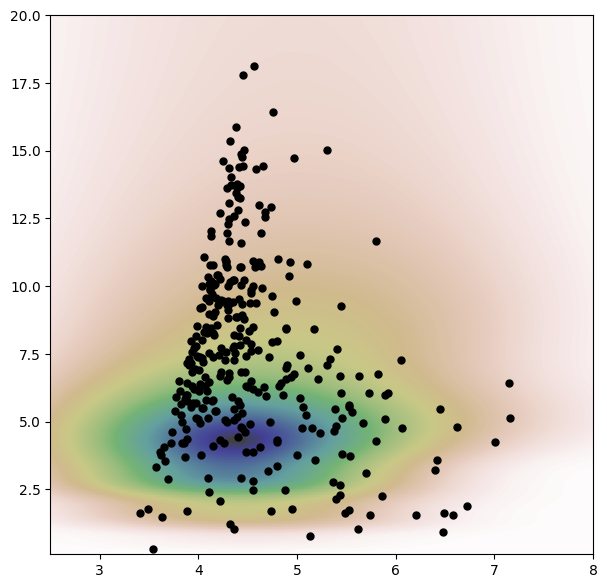

In [35]:
############### Let now try with KDEpy beckend

#kde2 = d.SimpleKernelDensityEstimation(sample, bandwidth=0.1, backend='KDEpy')
#use a
import adaptive_kde as ad
weights = None
kde2 = ad.AdaptiveBwKDE(data.T, weights, alpha=0.0, stdize=True, input_transf=['log', 'none'])
#kde2.fit_KDEpy() 
Z = kde2.evaluate_with_transf(grid_pts.T).reshape(z_mesh.shape)
#density_values = kde2.evaluate_KDEpy(positions.T)
#Z = np.reshape(density_values, X.shape)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(Z, cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax],
          aspect='auto', alpha=.75
         )
ax.plot(np.log10(all_Mz), all_z, 'ko', ms=5)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()